In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Set the directory path where the CSV files are located
directory_path = "C:/Users/DELL/Downloads/singapore_sales"


df = pd.concat([pd.read_csv(file) for file in glob.glob(os.path.join(directory_path, '*.csv'))], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
928681,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
928682,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
928683,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
928684,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


In [3]:
df.storey_range.unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '46 TO 48',
       '43 TO 45', '49 TO 51', '06 TO 10', '01 TO 05', '11 TO 15',
       '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928686 entries, 0 to 928685
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                928686 non-null  object 
 1   town                 928686 non-null  object 
 2   flat_type            928686 non-null  object 
 3   block                928686 non-null  object 
 4   street_name          928686 non-null  object 
 5   storey_range         928686 non-null  object 
 6   floor_area_sqm       928686 non-null  float64
 7   flat_model           928686 non-null  object 
 8   lease_commence_date  928686 non-null  int64  
 9   resale_price         928686 non-null  float64
 10  remaining_lease      219636 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.9+ MB


In [5]:

df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [6]:
df.nunique()

month                   414
town                     27
flat_type                 8
block                  2712
street_name             584
storey_range             25
floor_area_sqm          212
flat_model               34
lease_commence_date      55
resale_price           9538
remaining_lease         726
dtype: int64

In [7]:
df.drop('remaining_lease',axis=1,inplace=True)

In [8]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928686 entries, 0 to 928685
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                928686 non-null  object 
 1   town                 928686 non-null  object 
 2   flat_type            928686 non-null  object 
 3   block                928686 non-null  object 
 4   street_name          928686 non-null  object 
 5   storey_range         928686 non-null  object 
 6   floor_area_sqm       928686 non-null  float64
 7   flat_model           928686 non-null  object 
 8   lease_commence_date  928686 non-null  int64  
 9   resale_price         928686 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 70.9+ MB


In [10]:
cat_column = [col for col in df.columns if df[col].dtype == "object"]
num_column = [col for col in df.columns if df[col].dtype != "object"]

In [11]:
for col in cat_column:
    print(col,'-',len(df[col].unique()))

month - 414
town - 27
flat_type - 8
block - 2712
street_name - 584
storey_range - 25
flat_model - 34


In [12]:
for num in num_column:
    print(num,'-',len(df[num].unique()))

floor_area_sqm - 212
lease_commence_date - 55
resale_price - 9538


In [13]:
df.drop(['block','street_name'],axis=1,inplace=True)

In [14]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0


In [15]:
df['year'] = df['month'].apply(lambda x: int(str(x)[:4]))
df['month'] = df['month'].apply(lambda x: int(str(x)[-2:]))

In [16]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,1990
2,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,1990
3,1,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,1990
4,1,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990


In [17]:
df.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2013, 2014], dtype=int64)

In [18]:
df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [19]:
df.isna().sum()

month                  0
town                   0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year                   0
dtype: int64

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

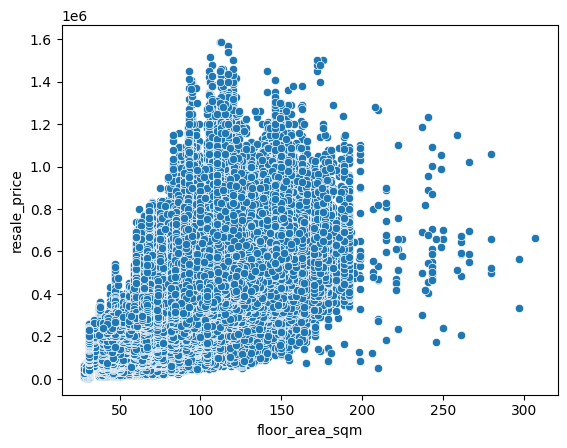

In [20]:
sns.scatterplot(data = df, x = "floor_area_sqm", y = "resale_price")

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


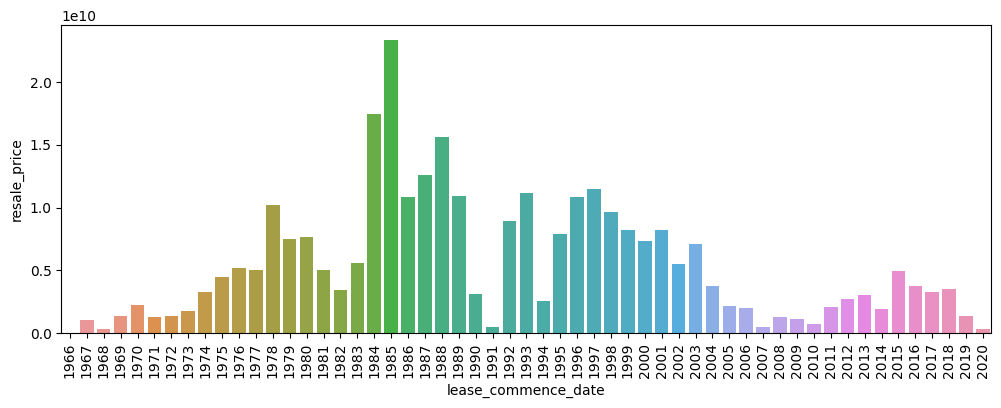

In [21]:
plt.figure(figsize=(12,4))
a = df.groupby('lease_commence_date')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data=a,x=a.index,y='resale_price')
plt.xticks(rotation=90)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


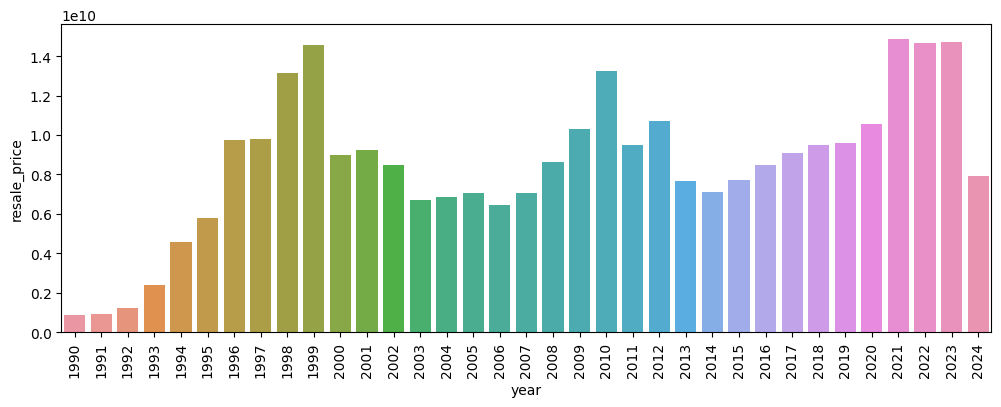

In [22]:
plt.figure(figsize=(12,4))
a = df.groupby('year')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data=a,x=a.index,y='resale_price')
plt.xticks(rotation=90)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


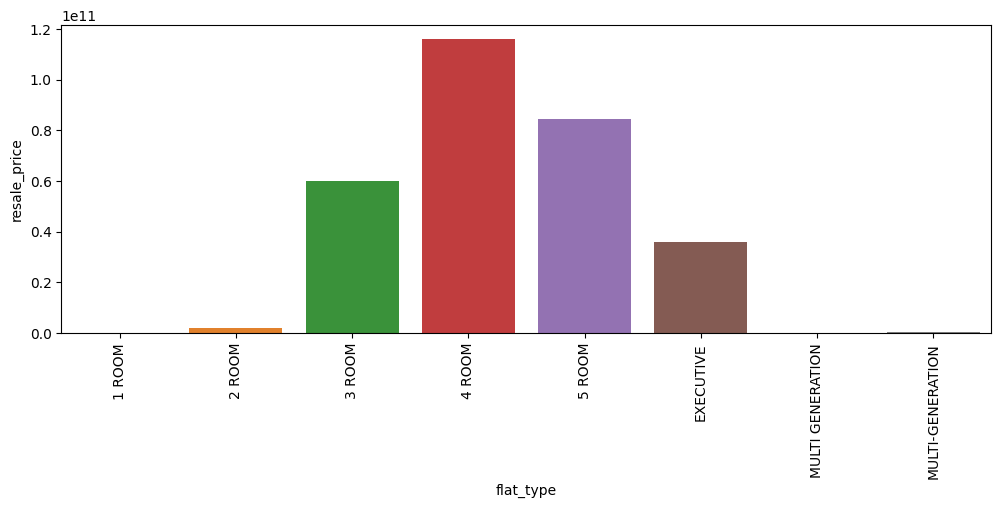

In [23]:
plt.figure(figsize=(12,4))
a = df.groupby('flat_type')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data=a,x=a.index,y='resale_price')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='year'>

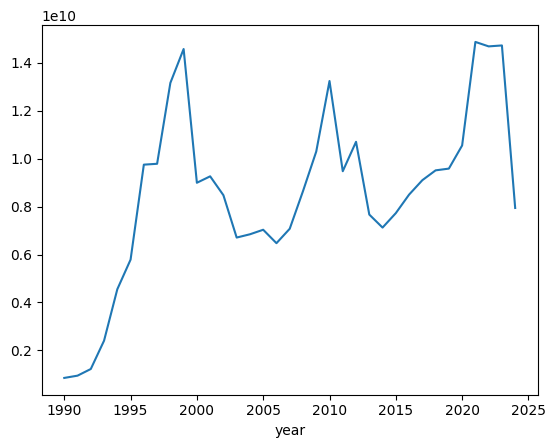

In [24]:
df.groupby('year').sum()['resale_price'].plot(kind='line')

<Axes: xlabel='lease_commence_date'>

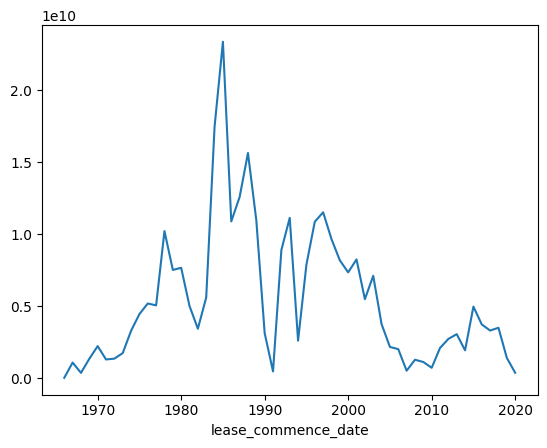

In [25]:
df.groupby('lease_commence_date').sum()['resale_price'].plot(kind='line')

In [26]:
scope_df = df[['floor_area_sqm','lease_commence_date','resale_price']]
scope_df

,floor_area_sqm,lease_commence_date,resale_price
0,31.0,1977,9000.0
1,31.0,1977,6000.0
2,31.0,1977,8000.0
3,31.0,1977,6000.0
4,73.0,1976,47200.0
...,...,...,...
928681,122.0,1988,580000.0
928682,146.0,1988,540000.0
928683,164.0,1992,738000.0
928684,152.0,1985,592000.0


In [27]:
scope_df = scope_df.drop_duplicates()
scope_df

,floor_area_sqm,lease_commence_date,resale_price
0,31.0,1977,9000.0
1,31.0,1977,6000.0
2,31.0,1977,8000.0
4,73.0,1976,47200.0
5,67.0,1977,46000.0
...,...,...,...
928666,84.0,1987,341500.0
928670,123.0,1984,426000.0
928675,111.0,2000,504000.0
928680,127.0,1987,500000.0


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


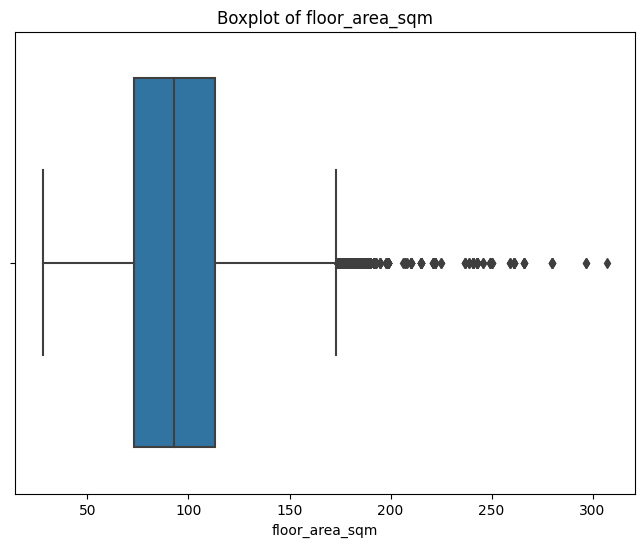

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


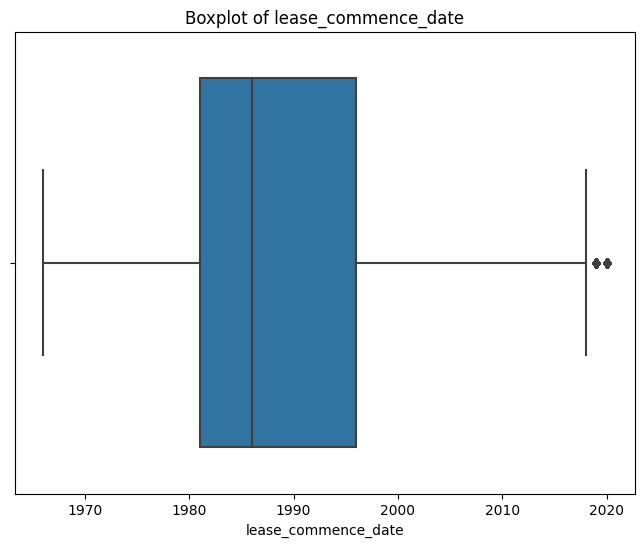

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


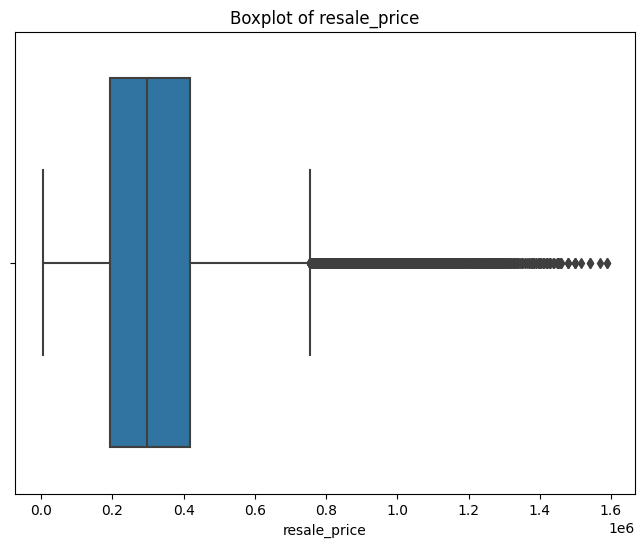

In [28]:
import seaborn as sb
import matplotlib.pyplot as plt 

col = ['floor_area_sqm','lease_commence_date','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [29]:
df1 = scope_df
df1

,floor_area_sqm,lease_commence_date,resale_price
0,31.0,1977,9000.0
1,31.0,1977,6000.0
2,31.0,1977,8000.0
4,73.0,1976,47200.0
5,67.0,1977,46000.0
...,...,...,...
928666,84.0,1987,341500.0
928670,123.0,1984,426000.0
928675,111.0,2000,504000.0
928680,127.0,1987,500000.0


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


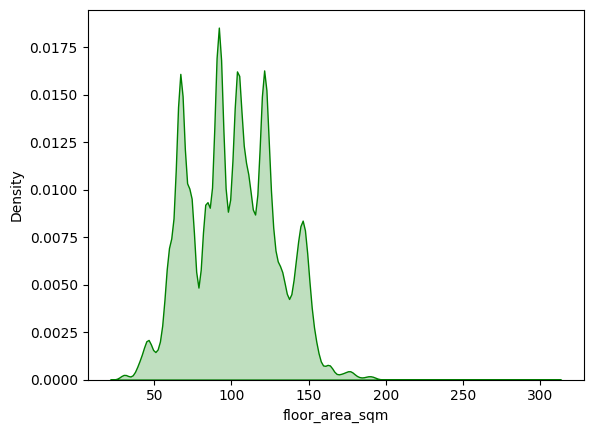

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


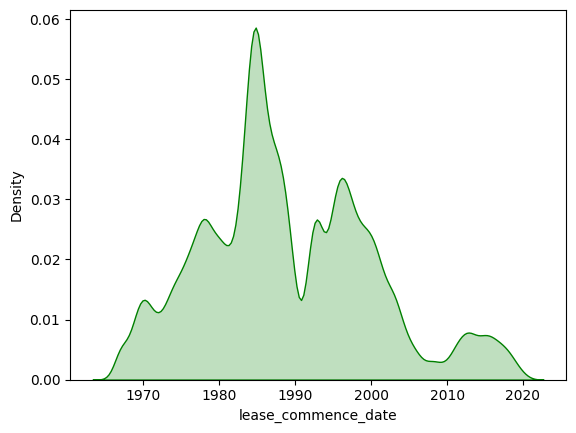

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


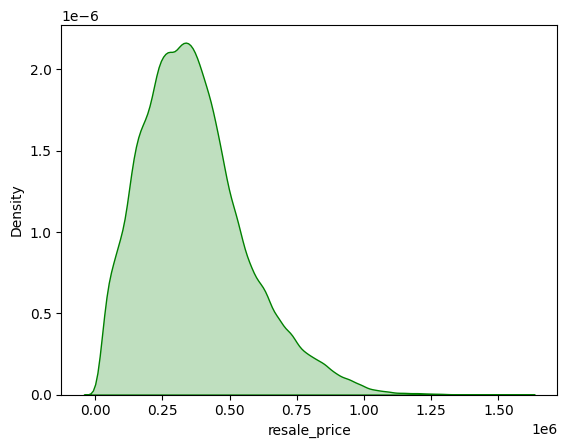

In [30]:
for i in df1.columns:
    sns.kdeplot(data=df1[i],fill=True,color="g")
    plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

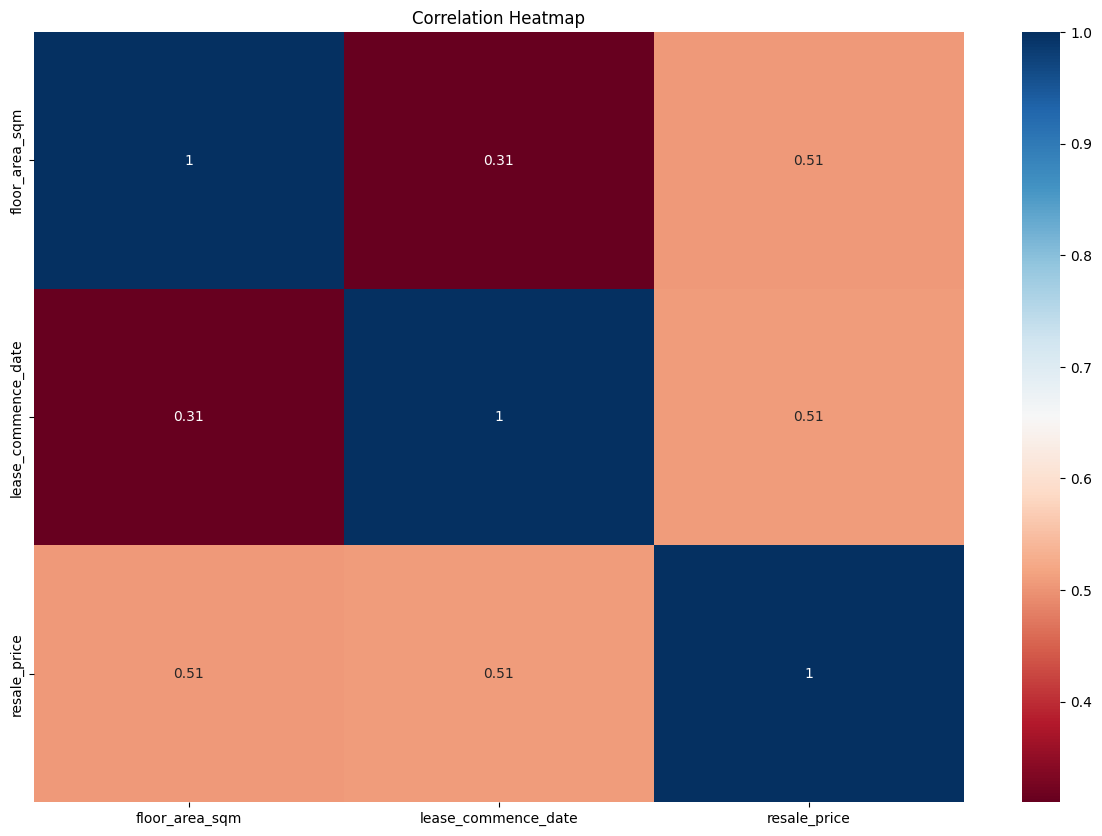

In [31]:
import seaborn as sns

corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

object_columns = df.select_dtypes(include=['object']).columns

df[object_columns] = df[object_columns].astype(str)

df[object_columns] = ordinal_encoder.fit_transform(df[object_columns])

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

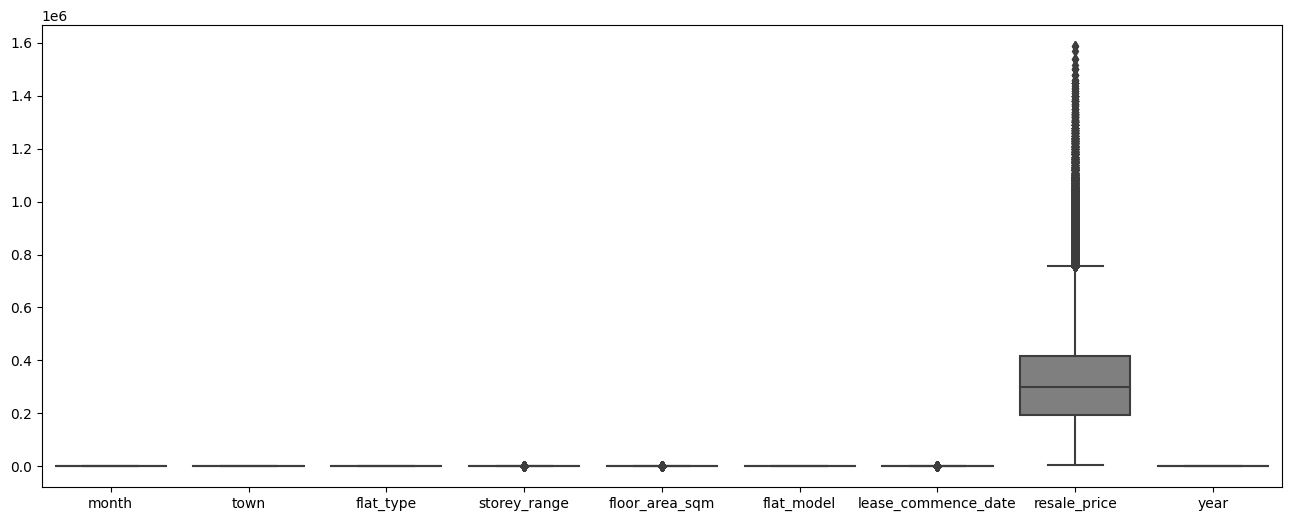

In [33]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


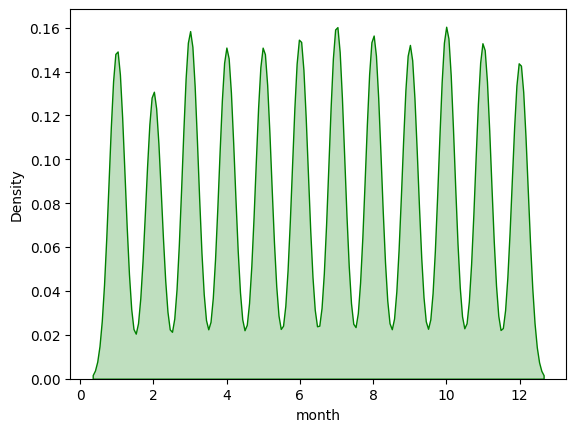

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


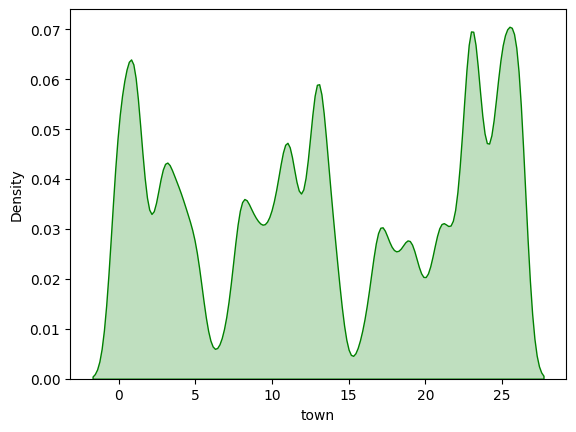

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


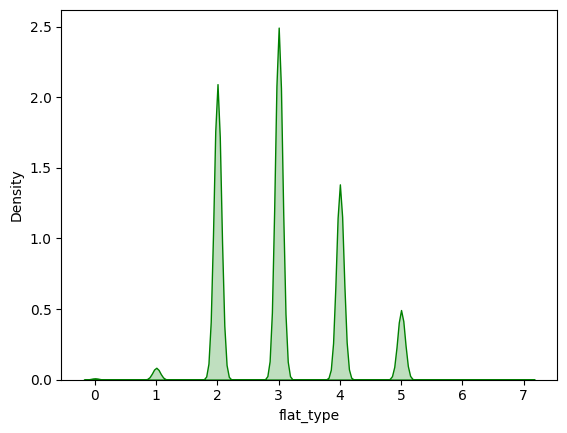

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


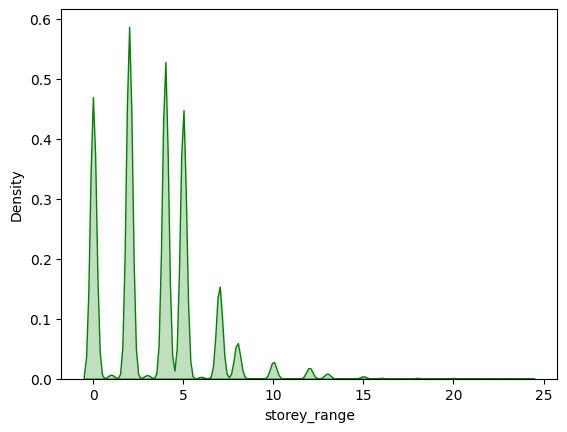

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


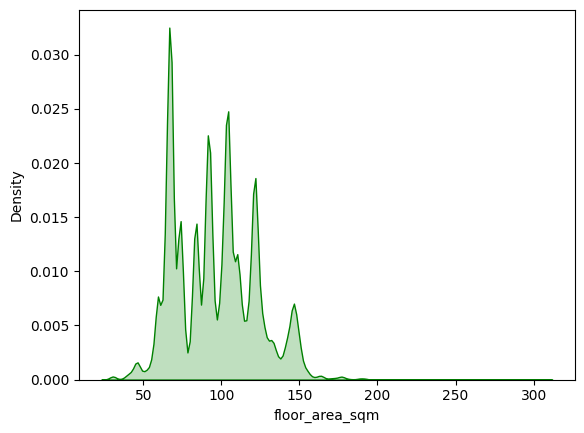

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


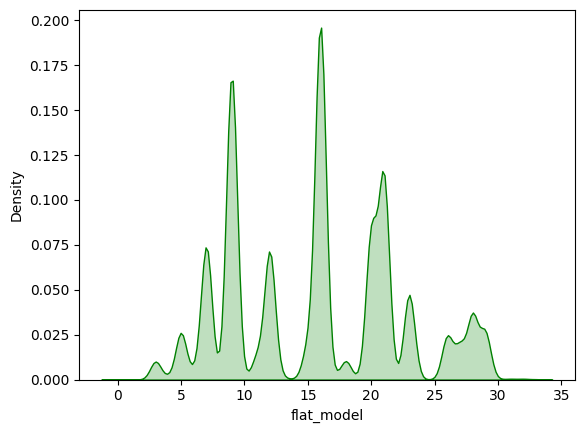

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


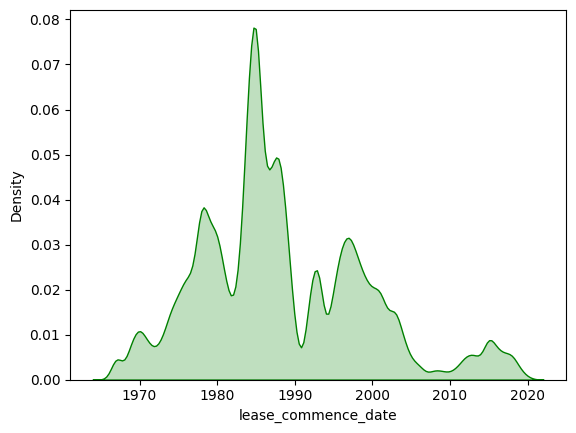

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


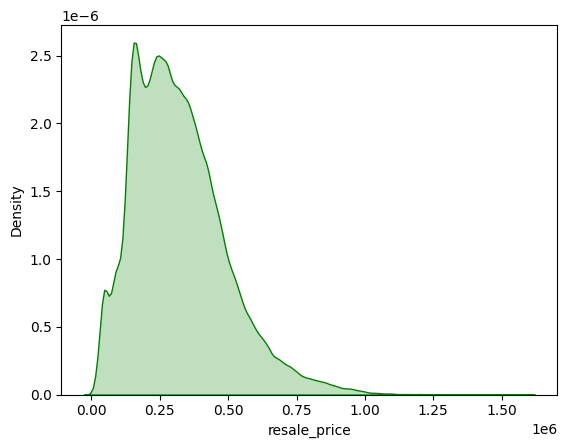

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


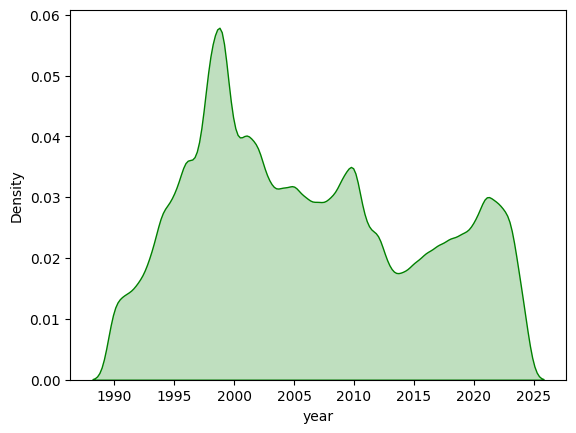

In [34]:
for i in df.columns:
    sns.kdeplot(data=df[i],fill=True,color="g")
    plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

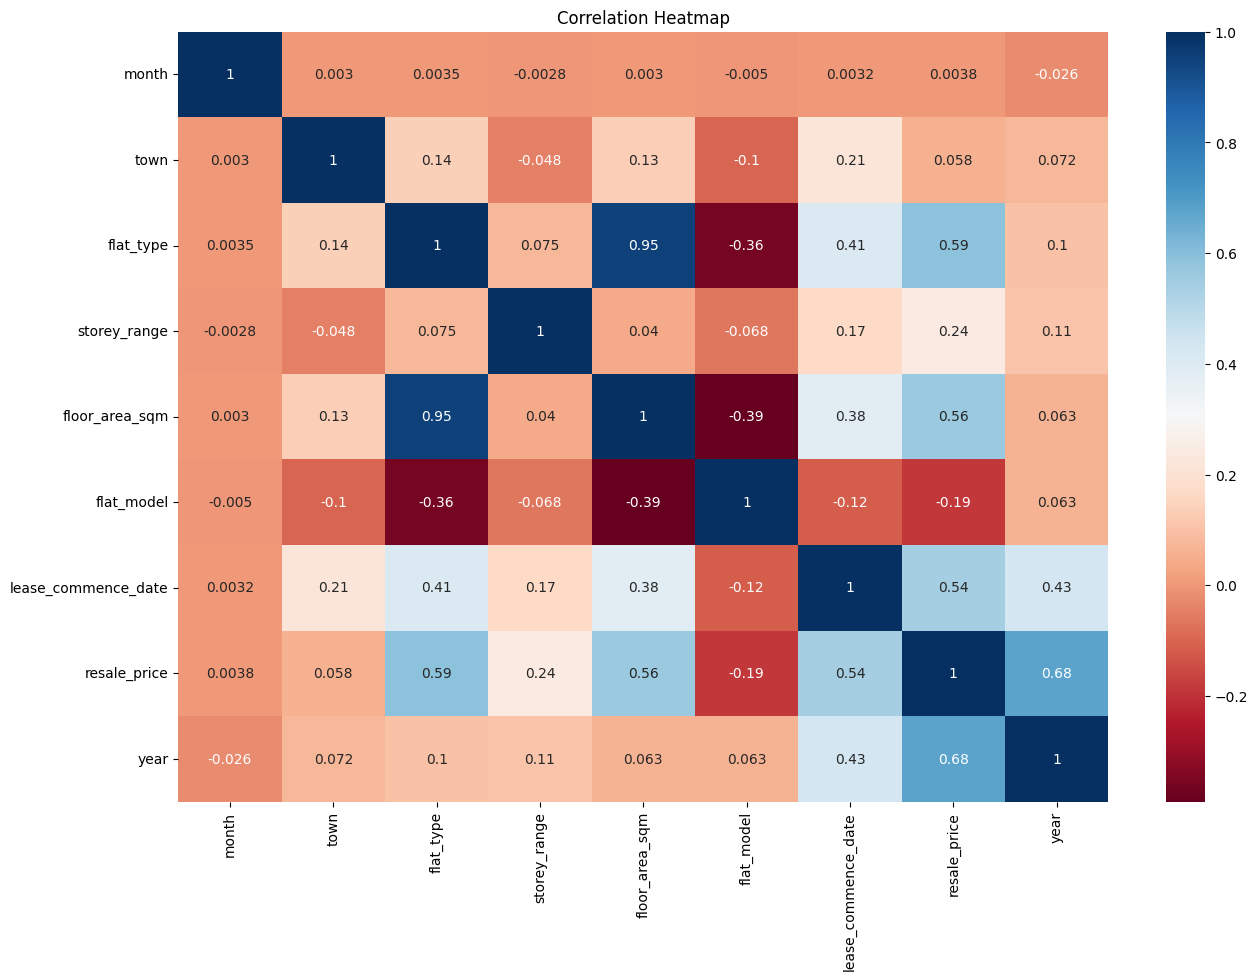

In [35]:
import seaborn as sns

corrMatrix = df.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

In [36]:
df.drop(['town','flat_type','flat_model'],axis=1,inplace=True)



In [37]:
X = df.drop("resale_price",axis=1)
Y = df['resale_price']

In [38]:

X.head()


,month,storey_range,floor_area_sqm,lease_commence_date,year
0,1,5.0,31.0,1977,1990
1,1,2.0,31.0,1977,1990
2,1,5.0,31.0,1977,1990
3,1,4.0,31.0,1977,1990
4,1,2.0,73.0,1976,1990


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [40]:
print(X_train.shape, X_test.shape)

(650080, 5) (278606, 5)


In [41]:
from sklearn.linear_model import LinearRegression

model_LG = LinearRegression()
model_LG.fit(X_train,Y_train)

LinearRegression()

In [42]:
predection = model_LG.predict(X_test)

In [43]:
from sklearn.metrics import r2_score

r2_score(Y_test,predection)

0.7535374426342046

In [44]:
pred = model_LG.predict(X_train)
r2_score(Y_train,pred)

0.7535867592858647

In [45]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor()
model_DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [46]:
Y_pred = model_DT.predict(X_test)
r2_score(Y_test,Y_pred)

0.849464959220848

In [47]:
Yt_pred = model_DT.predict(X_train)
r2_score(Y_train,Yt_pred)

0.9798010223302358

In [48]:
from sklearn.metrics import mean_absolute_error as mae
mae(Y_test,Y_pred)/df['resale_price'].max()

0.02525617534757389

In [49]:
df.columns

Index(['month', 'storey_range', 'floor_area_sqm', 'lease_commence_date',
       'resale_price', 'year'],
      dtype='object')

In [50]:
import pickle
with open('DTR_model.pkl', 'wb') as file:
      pickle.dump(model_DT,file)

In [51]:
import pickle

# Load the model from the file
with open('DTR_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [52]:
df.tail()

,month,storey_range,floor_area_sqm,lease_commence_date,resale_price,year
928681,12,5.0,122.0,1988,580000.0,2014
928682,12,5.0,146.0,1988,540000.0,2014
928683,12,4.0,164.0,1992,738000.0,2014
928684,12,4.0,152.0,1985,592000.0,2014
928685,12,2.0,146.0,1985,545000.0,2014


In [53]:
print(df.floor_area_sqm.min())
print(df.floor_area_sqm.max())

28.0
307.0


In [54]:
month = 7

storey_range = 5.0
floor_area_sqm = 122.0

lease_commence_date = 1988
year = 2014

In [55]:
model_DT.predict(np.array([[7,122.0,1988,2018,2.0]]))

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([300000.])

In [56]:
import pickle

model_file_path = "C:/Users/DELL/Downloads/singapore_sales"

with open(model_file_path, 'wb') as file:
    pickle.dump(model_DT, file)


PermissionError: [Errno 13] Permission denied: 'C:/Users/DELL/Downloads/singapore_sales'

import os
import pickle

# Define the directory and file path
directory = "C:/Users/DELL/Downloads"
model_file_path = os.path.join(directory, "singapore_sales.pkl")

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the model
with open(model_file_path, 'wb') as file:
    pickle.dump(model_DT, file)

print(f"Model saved to {model_file_path}")


In [ ]:
import os
import pickle

# Define the directory and file path
directory = "C:/Users/DELL/Downloads"
model_file_path = os.path.join(directory, "singapore_sales.pkl")

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the model
with open(model_file_path, 'wb') as file:
    pickle.dump(model_DT, file)

print(f"Model saved to {model_file_path}")
